<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log Transform

In [1]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku

In [4]:
def show(img, show_hist=True, show_by_channel=False, density=False):
    dims = img.shape
    if len(dims) < 2:
        print('Not an image')
        return
    if len(dims) == 2:
        # gray scale image, require aditional last channel
        #print('Expandig last dim')
        img = np.expand_dims(img, -1)
    
    # map to uint8
    img = np.array(img, dtype = np.uint8) 

    channels = img.shape[-1] # last dim is the channel
    if channels == 3:
        labels = ['Red', 'Green', 'Blue']
        colors = ['r', 'g', 'b']
    else:
        labels = ['Gray']
        colors = ['gray']
    if show_hist:
        if show_by_channel and channels == 3:
            fig, axs = plt.subplots(2, channels + 1,
                                       figsize=(12, 6))
            
            # Display original image.
            axs[0, 0].imshow(img)
            axs[0, 0].set_axis_off()
            axs[1, 0].set_axis_off()
            for i in range(channels):
                axs[0, i+1].imshow(img[..., i])
                axs[0, i+1].set_axis_off()

            # Display the histogram.
            for i, (label, color) in enumerate(zip(labels, colors)):
                axs[1, i+1].hist(img[..., i].ravel(), lw=0, bins=256, color=color, density=density)
                axs[1, i+1].set_xlim(0, img[..., i].max())
                axs[1, i+1].set(xlabel=label)
                axs[1, i+1].set_yticks([])
        
            plt.show()
        else:
            # Display the image.
            fig, axs = plt.subplots(1, channels + 1,
                                        figsize=(12, 3))
        
            if channels == 3:
                axs[0].imshow(img)
            if channels == 1:
                axs[0].imshow(img[..., 0], cmap='gray')
            axs[0].set_axis_off()
        
            # Display the histogram.
            for i, (label, color) in enumerate(zip(labels, colors)):
                axs[i+1].hist(img[..., i].ravel(), lw=0, bins=256, color=color, density=density)
              
        
            plt.show()
    else:
        # Display the image.
        fig = plt.figure(figsize=(3, 3))
        if channels == 3:
            plt.imshow(img)
        if channels == 1:
            plt.imshow(img[..., 0], cmap='gray')
        plt.axis('off')

**Log Transform**

The general form of the log transformation is 

$l(x) = k \cdot log(1+x), x \in[0, 255]$ (1)

where $k$ is a constant, and $x$ is the input image.

This transformation maps a narrow range of low intensity values in the input into a wider range of output levels

We can rewrite Eq (1) to such that all the maped values are in the renge of $[0, 255]$:

$l(x) = \frac{255}{k} \cdot log(\frac{x+1}{min(x) + 1}), \forall k = log(\frac{max(x) + 1}{min(x) + 1}),  x \in[0, 255].$ (2)

---

If we apply any base $B$ to the $log$, then 

$log_B (x) = \frac{ln(x)}{ln(B)}$.

Thus 

$l(x, B) = \frac{255}{\frac{k}{log(B)}} \cdot \frac{log(\cdot)}{log(B)} = l(x)$

Notice that the terms $log(B)$ in the denominators are cancelled. In such a way, the log transform is invariant to the base election.

---

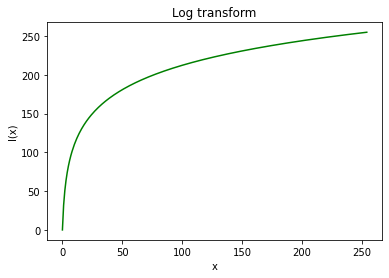

In [14]:
x = np.arange(0, 255)
minx, maxx = np.min(x), np.max(x)
k = np.log((maxx + 1)/(minx + 1))
y = 255/k*np.log((1 + x)/(minx + 1))
plt.plot(x, y, color='green') 
plt.xlabel('x') 
plt.ylabel('l(x)') 
plt.title("Log transform")
plt.show() 

In [ ]:
def logTransform(img, base=2, display=True):
    img_min, img_max = np.min(img), np.max(img)
    A = np.log((img_max + 1)/(img_min + 1)) 
    print('A: ', A)
    img2 = 255/(A / np.log(base)) * (np.log((img + 1)/(img_min + 1)) / np.log(base))

    if display:
        show(img2)

    return img2

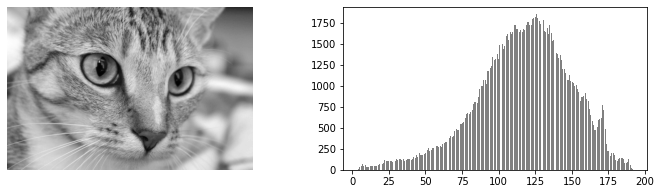

In [ ]:
# working in range [0.0, 255.0]
img = skimage.img_as_float(skid.chelsea())*255.0
# read from file
#skimage.io.imread('address.jpeg') 

# convert to gray-scale image
gray_img = skic.rgb2gray(img)
show(gray_img)

In [ ]:
base_widget = FloatSlider(min=2, max=10, step=1, value=2, continuous_update=False)
w = interactive(logTransform,img=fixed(gray_img), base=base_widget, display=True);
display(w)

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='base', max=10.0, min=2.0, s…

In [ ]:
def logTransformRGB(img, base):
    dims = img.shape
    if len(dims) !=3:
        print('Not RGB image')
        return img

    img_rg = logTransform(img[..., 0], base, False)
    img_gg = logTransform(img[..., 1], base, False)
    img_bg = logTransform(img[..., 2], base, False)

    img2 = np.stack([img_rg, img_gg, img_bg], axis=-1)

    show(img2)

    return img2

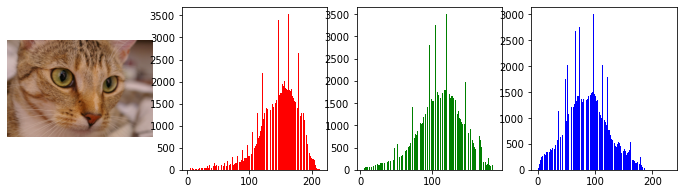

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='base', max=10.0, min=2.0, s…

In [ ]:
show(img)

base_widget2 = FloatSlider(min=2, max=10, step=1, value=2, continuous_update=False)
w2 = interactive(logTransformRGB,img=fixed(img), base=base_widget2);
display(w2)
